In [1]:
import pandas as pd

In [2]:
# # mog = pd.read_csv("results_mog_morph.csv")
# # mog_morph_20 = pd.read_csv("results_mog_morph_20.csv")
# # mog_morph_50_circle = pd.read_csv("results_mog_morph_50_circle.csv")
results = pd.read_csv("results.csv")
# # (mog["iou"].mean(),
# # mog_morph_20["iou"].mean(),
# # mog_morph_50_circle["iou"].mean(),
# results["iou"].mean()

In [3]:
# mog

In [4]:
# filter all rows with video_id containing underscore
# moving_background_morph20 = mog_morph_20[mog_morph_20["video_id"].str.contains("_")]
# moving_background_morph50_circle = mog_morph_50_circle[mog_morph_50_circle["video_id"].str.contains("_")]
# moving_background = mog[mog["video_id"].str.contains("_")]
# moving_background_results = results[results["video_id"].str.contains("_")]

# # moving_background_morph20["iou"].mean(), moving_background_morph50_circle["iou"].mean(), 
# moving_background["iou"].mean(), moving_background_results["iou"].mean()

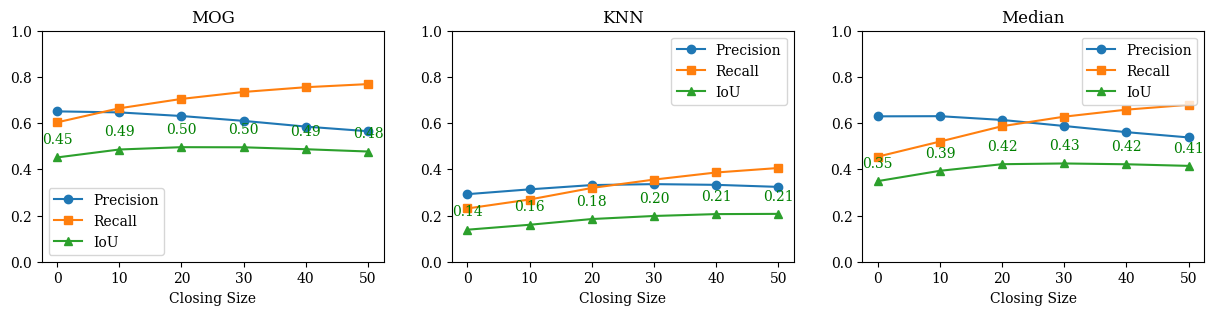

In [37]:
import pandasql as ps
import pylab
data = pd.read_csv("results_bgs_only.csv")
mog = ps.sqldf("SELECT * FROM data WHERE method = 'mog'", locals())
knn = ps.sqldf("SELECT * FROM data WHERE method = 'knn'", locals())
median = ps.sqldf("SELECT * FROM data WHERE method = 'median'", locals())
table = [None, "mog", "knn", "median"]
title = [None, "MOG", "KNN", "Median"]
pylab.rcParams['figure.figsize'] = [15, 3]
for i in range(1, 4): 
    pylab.subplot(1, 3, i)
    # set the size to square
    df_selected = ps.sqldf(f"SELECT morph, AVG(iou) as iou, AVG(precision) as pre, AVG(recall) as rec FROM {table[i]} GROUP BY morph", locals())
    import pylab
    import matplotlib.pyplot as plt
    plt.rcParams["font.family"] = "serif"

    pylab.plot(df_selected["morph"], df_selected["pre"], label="Precision", marker='o')
    pylab.plot(df_selected["morph"], df_selected["rec"], label="Recall", marker='s')
    pylab.plot(df_selected["morph"], df_selected["iou"], label="IoU", marker='^')

    pylab.title(f"{title[i]}")
    for i in range(len(df_selected)):
        pylab.annotate(f'{df_selected["iou"][i]:.2f}', (df_selected["morph"][i], df_selected["iou"][i]), textcoords="offset points", xytext=(0,10), ha='center', color='green')
    pylab.ylim(0, 1)
    pylab.xlabel("Closing Size")
    pylab.legend()
pylab.show()

In [6]:
moving_background_videos = ['vid19', 'vid15_crowd', 'vid28','vid2_human', 'vid3_bats', 'vid11_brightbats', 'vid23', 'vid26', 'vid20', 'vid22', 'vid25', 'vid21', 'vid27']
all_videos = ['vid15', 'vid10', 'vid19', 'vid17', 'vid5', 'vid9', 'vid15_crowd',
       'vid28', 'vid8', 'vid18', 'vid2_human', 'vid16', 'vid12',
       'vid3_bats', 'vid11', 'vid11_brightbats', 'vid23', 'vid3', 'vid26',
       'vid7', 'vid6', 'vid20', 'vid22', 'vid25', 'vid21', 'vid13',
       'vid4', 'vid2', 'vid1', 'vid27']
static_background_videos = list(set(all_videos) - set(moving_background_videos))

In [7]:
background_classes = []
for video in all_videos:
    if video in moving_background_videos:
        background_classes.append({"video_id": video, "background": "moving"})
    else:
        background_classes.append({"video_id": video, "background": "static"})

In [8]:
background_classes = pd.DataFrame(background_classes)

In [9]:
# stat_mog_morph
ps.sqldf("""SELECT * FROM
         (SELECT AVG(iou) as iou, AVG(precision) as precision, AVG(recall) as recall, AVG(fla) as fla, morph
         FROM (SELECT * FROM mog JOIN background_classes ON mog.video_id=background_classes.video_id)
         where (background='static' AND morph>0) GROUP BY morph) ORDER BY iou DESC LIMIT 1""", locals())

,iou,precision,recall,fla,morph
0,0.564853,0.666007,0.801609,0.847698,20


In [10]:
# moving_mog_morph
ps.sqldf("""SELECT * FROM
         (SELECT ROUND(AVG(iou), 2) as iou, ROUND(AVG(precision), 2) as precision, ROUND(AVG(recall), 2) as recall, ROUND(AVG(fla), 2) as fla, morph
         FROM (SELECT * FROM mog JOIN background_classes ON mog.video_id=background_classes.video_id)
         where (background='moving' AND morph>0) GROUP BY morph) ORDER BY iou DESC LIMIT 1""", locals())

,iou,precision,recall,fla,morph
0,0.38,0.57,0.54,0.69,20


In [11]:
# all_mog_morph
ps.sqldf("""SELECT * FROM
         (SELECT ROUND(AVG(iou), 2) as iou, ROUND(AVG(precision), 2) as precision, ROUND(AVG(recall), 2) as recall, ROUND(AVG(fla), 2) as fla, morph
         FROM (SELECT * FROM mog JOIN background_classes ON mog.video_id=background_classes.video_id)
         where (morph>0) GROUP BY morph) ORDER BY iou DESC LIMIT 1""", locals())

,iou,precision,recall,fla,morph
0,0.5,0.63,0.7,0.79,20


In [12]:
# stat_median_morph
ps.sqldf("""SELECT * FROM
         (SELECT ROUND(AVG(iou), 2) as iou, ROUND(AVG(precision), 2) as precision, ROUND(AVG(recall), 2) as recall, ROUND(AVG(fla), 2) as fla, morph
         FROM (SELECT * FROM median JOIN background_classes ON median.video_id=background_classes.video_id)
         where (background='static' AND morph>0) GROUP BY morph) ORDER BY iou DESC LIMIT 1""", locals())

,iou,precision,recall,fla,morph
0,0.5,0.66,0.69,0.85,20


In [13]:
# moving_median_morph
ps.sqldf("""SELECT * FROM
         (SELECT ROUND(AVG(iou), 2) as iou, ROUND(AVG(precision), 2) as precision, ROUND(AVG(recall), 2) as recall, ROUND(AVG(fla), 2) as fla, morph
         FROM (SELECT * FROM median JOIN background_classes ON median.video_id=background_classes.video_id)
         where (background='moving' AND morph>0) GROUP BY morph) ORDER BY iou DESC LIMIT 1""", locals())

,iou,precision,recall,fla,morph
0,0.3,0.52,0.44,0.68,30


In [14]:
# all_median_morph
ps.sqldf("""SELECT * FROM
         (SELECT ROUND(AVG(iou), 2) as iou, ROUND(AVG(precision), 2) as precision, ROUND(AVG(recall), 2) as recall, ROUND(AVG(fla), 2) as fla, morph
         FROM (SELECT * FROM median JOIN background_classes ON median.video_id=background_classes.video_id)
         where (morph>0) GROUP BY morph) ORDER BY iou DESC LIMIT 1""", locals())

,iou,precision,recall,fla,morph
0,0.43,0.59,0.63,0.79,30


In [43]:
for bgs in ["mog", "knn", "median"]:
    combined_query = f"""
    SELECT 'static' AS category, iou, precision, recall, fla, morph FROM (
        SELECT ROUND(AVG(iou), 2) AS iou,
            ROUND(AVG(precision), 2) AS precision,
            ROUND(AVG(recall), 2) AS recall,
            ROUND(AVG(fla), 2) AS fla,
            morph
        FROM (
            SELECT * FROM {bgs}
            JOIN background_classes ON {bgs}.video_id = background_classes.video_id
        )
        WHERE background = 'static' AND morph = 0
        GROUP BY morph
        ORDER BY iou DESC
        LIMIT 1
    )
    UNION ALL
    SELECT 'moving' AS category, iou, precision, recall, fla, morph FROM (
        SELECT ROUND(AVG(iou), 2) AS iou,
            ROUND(AVG(precision), 2) AS precision,
            ROUND(AVG(recall), 2) AS recall,
            ROUND(AVG(fla), 2) AS fla,
            morph
        FROM (
            SELECT * FROM {bgs}
            JOIN background_classes ON {bgs}.video_id = background_classes.video_id
        )
        WHERE background = 'moving' AND morph = 0
        GROUP BY morph
        ORDER BY iou DESC
        LIMIT 1
    )
    UNION ALL
    SELECT 'all' AS category, iou, precision, recall, fla, morph FROM (
        SELECT ROUND(AVG(iou), 2) AS iou,
            ROUND(AVG(precision), 2) AS precision,
            ROUND(AVG(recall), 2) AS recall,
            ROUND(AVG(fla), 2) AS fla,
            morph
        FROM (
            SELECT * FROM {bgs}
            JOIN background_classes ON {bgs}.video_id = background_classes.video_id
        )
        WHERE morph = 0
        GROUP BY morph
        ORDER BY iou DESC
        LIMIT 1
    )
    """
    mog_no_morph = ps.sqldf(combined_query, locals())
    print(f"{bgs}")
    for i in range(3):
        row = mog_no_morph.loc[i]
        print(f"{row['iou']} / {row['precision']} / {row['recall']} / {row['fla']}", end="\t")
    print()

mog
0.51 / 0.68 / 0.68 / 0.85	0.35 / 0.6 / 0.47 / 0.69	0.45 / 0.65 / 0.6 / 0.79	
knn
0.16 / 0.32 / 0.26 / 0.78	0.11 / 0.24 / 0.18 / 0.63	0.14 / 0.29 / 0.23 / 0.72	
median
0.41 / 0.67 / 0.53 / 0.85	0.25 / 0.56 / 0.33 / 0.68	0.35 / 0.63 / 0.45 / 0.79	


In [44]:
for bgs in ["mog", "knn", "median"]:
    combined_query = f"""
    SELECT 'static' AS category, iou, precision, recall, fla, morph FROM (
        SELECT ROUND(AVG(iou), 2) AS iou,
            ROUND(AVG(precision), 2) AS precision,
            ROUND(AVG(recall), 2) AS recall,
            ROUND(AVG(fla), 2) AS fla,
            morph
        FROM (
            SELECT * FROM {bgs}
            JOIN background_classes ON {bgs}.video_id = background_classes.video_id
        )
        WHERE background = 'static' AND morph > 0
        GROUP BY morph
        ORDER BY iou DESC
        LIMIT 1
    )
    UNION ALL
    SELECT 'moving' AS category, iou, precision, recall, fla, morph FROM (
        SELECT ROUND(AVG(iou), 2) AS iou,
            ROUND(AVG(precision), 2) AS precision,
            ROUND(AVG(recall), 2) AS recall,
            ROUND(AVG(fla), 2) AS fla,
            morph
        FROM (
            SELECT * FROM {bgs}
            JOIN background_classes ON {bgs}.video_id = background_classes.video_id
        )
        WHERE background = 'moving' AND morph > 0
        GROUP BY morph
        ORDER BY iou DESC
        LIMIT 1
    )
    UNION ALL
    SELECT 'all' AS category, iou, precision, recall, fla, morph FROM (
        SELECT ROUND(AVG(iou), 2) AS iou,
            ROUND(AVG(precision), 2) AS precision,
            ROUND(AVG(recall), 2) AS recall,
            ROUND(AVG(fla), 2) AS fla,
            morph
        FROM (
            SELECT * FROM {bgs}
            JOIN background_classes ON {bgs}.video_id = background_classes.video_id
        )
        WHERE morph > 0
        GROUP BY morph
        ORDER BY iou DESC
        LIMIT 1
    )
    """
    mog_no_morph = ps.sqldf(combined_query, locals())
    print(f"{bgs}")
    for i in range(3):
        row = mog_no_morph.loc[i]
        print(f"{row['iou']} / {row['precision']} / {row['recall']} / {row['fla']}", end="\t")
    print()

mog
0.56 / 0.64 / 0.83 / 0.85	0.38 / 0.53 / 0.58 / 0.69	0.5 / 0.61 / 0.73 / 0.79	
knn
0.23 / 0.36 / 0.46 / 0.78	0.16 / 0.27 / 0.31 / 0.63	0.21 / 0.32 / 0.41 / 0.72	
median
0.5 / 0.63 / 0.74 / 0.85	0.3 / 0.49 / 0.48 / 0.68	0.43 / 0.59 / 0.63 / 0.79	


In [62]:
import pandasql as ps
import pandas as pd
results = pd.read_csv("results.csv")


for background in ["static", "moving", ""]:
  ours = ps.sqldf(f"""
          SELECT ROUND(AVG(iou), 2) AS iou,
            ROUND(AVG(precision), 2) AS precision,
            ROUND(AVG(recall), 2) AS recall,
              ROUND(AVG(fla), 2) AS fla, 
            background
      FROM results JOIN background_classes ON results.video_id = background_classes.video_id WHERE background LIKE '%{background}%'
          """, locals())
  print(f"{ours.loc[0]['iou']} / {ours.loc[0]['precision']} / {ours.loc[0]['recall']} / {ours.loc[0]['fla']}", end="\t")


0.66 / 0.76 / 0.85 / 0.92	0.54 / 0.62 / 0.81 / 0.89	0.62 / 0.7 / 0.84 / 0.91	

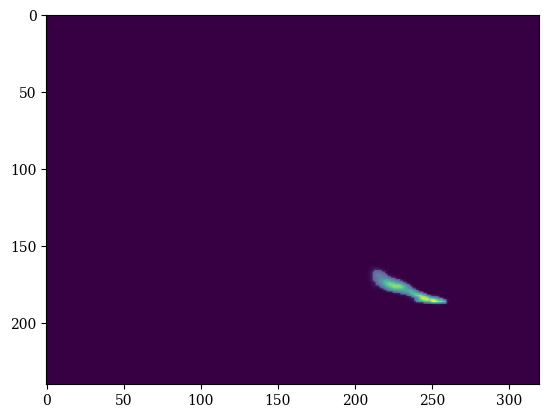

In [17]:
import cv2
import pylab

pylab.imshow((cv2.imread("../sim/gt/smoke_only1_0243.png").mean(-1)>20) * 255, cmap="gray")
pylab.imshow(cv2.imread("../sim/gt/smoke_only1_0243.png").mean(-1), alpha=0.8)